In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

In [2]:
import glob

ticker = '8035'
glob_path = 'cache/%s*.pkl' % ticker
files = sorted(glob.glob(glob_path))
files, len(files)

(['cache/8035.T_2024-02-26_2024-02-27_1m.pkl',
  'cache/8035.T_2024-02-27_2024-02-28_1m.pkl',
  'cache/8035.T_2024-02-28_2024-02-29_1m.pkl',
  'cache/8035.T_2024-02-29_2024-03-01_1m.pkl',
  'cache/8035.T_2024-03-01_2024-03-02_1m.pkl',
  'cache/8035.T_2024-03-04_2024-03-05_1m.pkl',
  'cache/8035.T_2024-03-05_2024-03-06_1m.pkl',
  'cache/8035.T_2024-03-06_2024-03-07_1m.pkl',
  'cache/8035.T_2024-03-07_2024-03-08_1m.pkl',
  'cache/8035.T_2024-03-08_2024-03-09_1m.pkl',
  'cache/8035.T_2024-03-11_2024-03-12_1m.pkl',
  'cache/8035.T_2024-03-12_2024-03-13_1m.pkl',
  'cache/8035.T_2024-03-13_2024-03-14_1m.pkl',
  'cache/8035.T_2024-03-14_2024-03-15_1m.pkl',
  'cache/8035.T_2024-03-15_2024-03-16_1m.pkl',
  'cache/8035.T_2024-03-18_2024-03-19_1m.pkl',
  'cache/8035.T_2024-03-19_2024-03-20_1m.pkl',
  'cache/8035.T_2024-03-21_2024-03-22_1m.pkl',
  'cache/8035.T_2024-03-22_2024-03-23_1m.pkl',
  'cache/8035.T_2024-03-25_2024-03-26_1m.pkl',
  'cache/8035.T_2024-03-26_2024-03-27_1m.pkl',
  'cache/8035

In [20]:
import pandas as pd

list_df_close = list()
for pkl in files:
    file = os.path.join(pkl)    
    df = pd.read_pickle(file)
    list_df_close.append(df['Close'])

#df_close = pd.concat(list_df_close).reset_index(drop=True)
df_close = pd.concat(list_df_close)
#df_close = pd.DataFrame(df_close)
df_close

Datetime
2024-02-26 09:00:00+09:00    36490.0
2024-02-26 09:01:00+09:00    36580.0
2024-02-26 09:02:00+09:00    36540.0
2024-02-26 09:03:00+09:00    36530.0
2024-02-26 09:04:00+09:00    36470.0
                              ...   
2024-05-02 14:55:00+09:00    35030.0
2024-05-02 14:56:00+09:00    35050.0
2024-05-02 14:57:00+09:00    35050.0
2024-05-02 14:58:00+09:00    35060.0
2024-05-02 14:59:00+09:00    35080.0
Name: Close, Length: 14109, dtype: float64

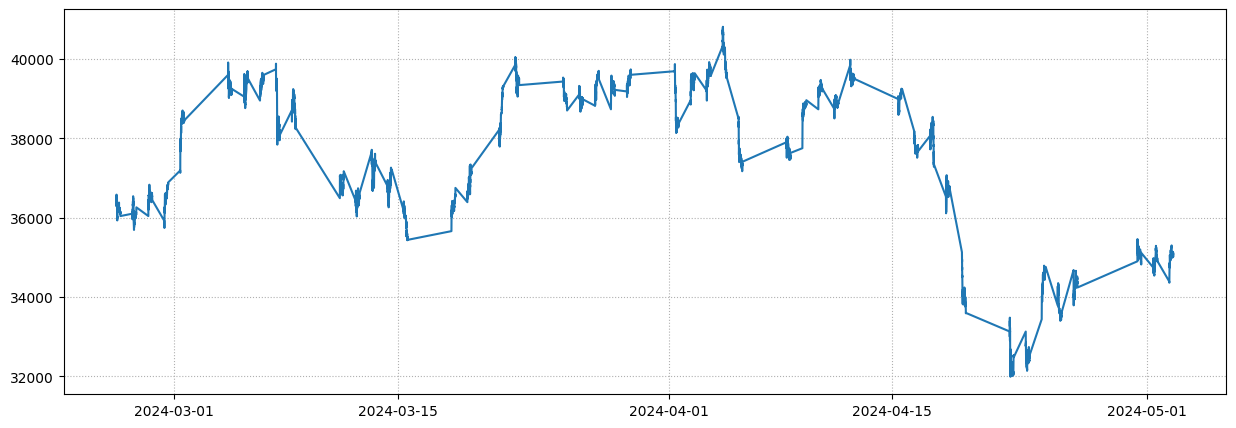

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()

ax.plot(
    df_close
)
plt.grid(linestyle=':')
plt.show()

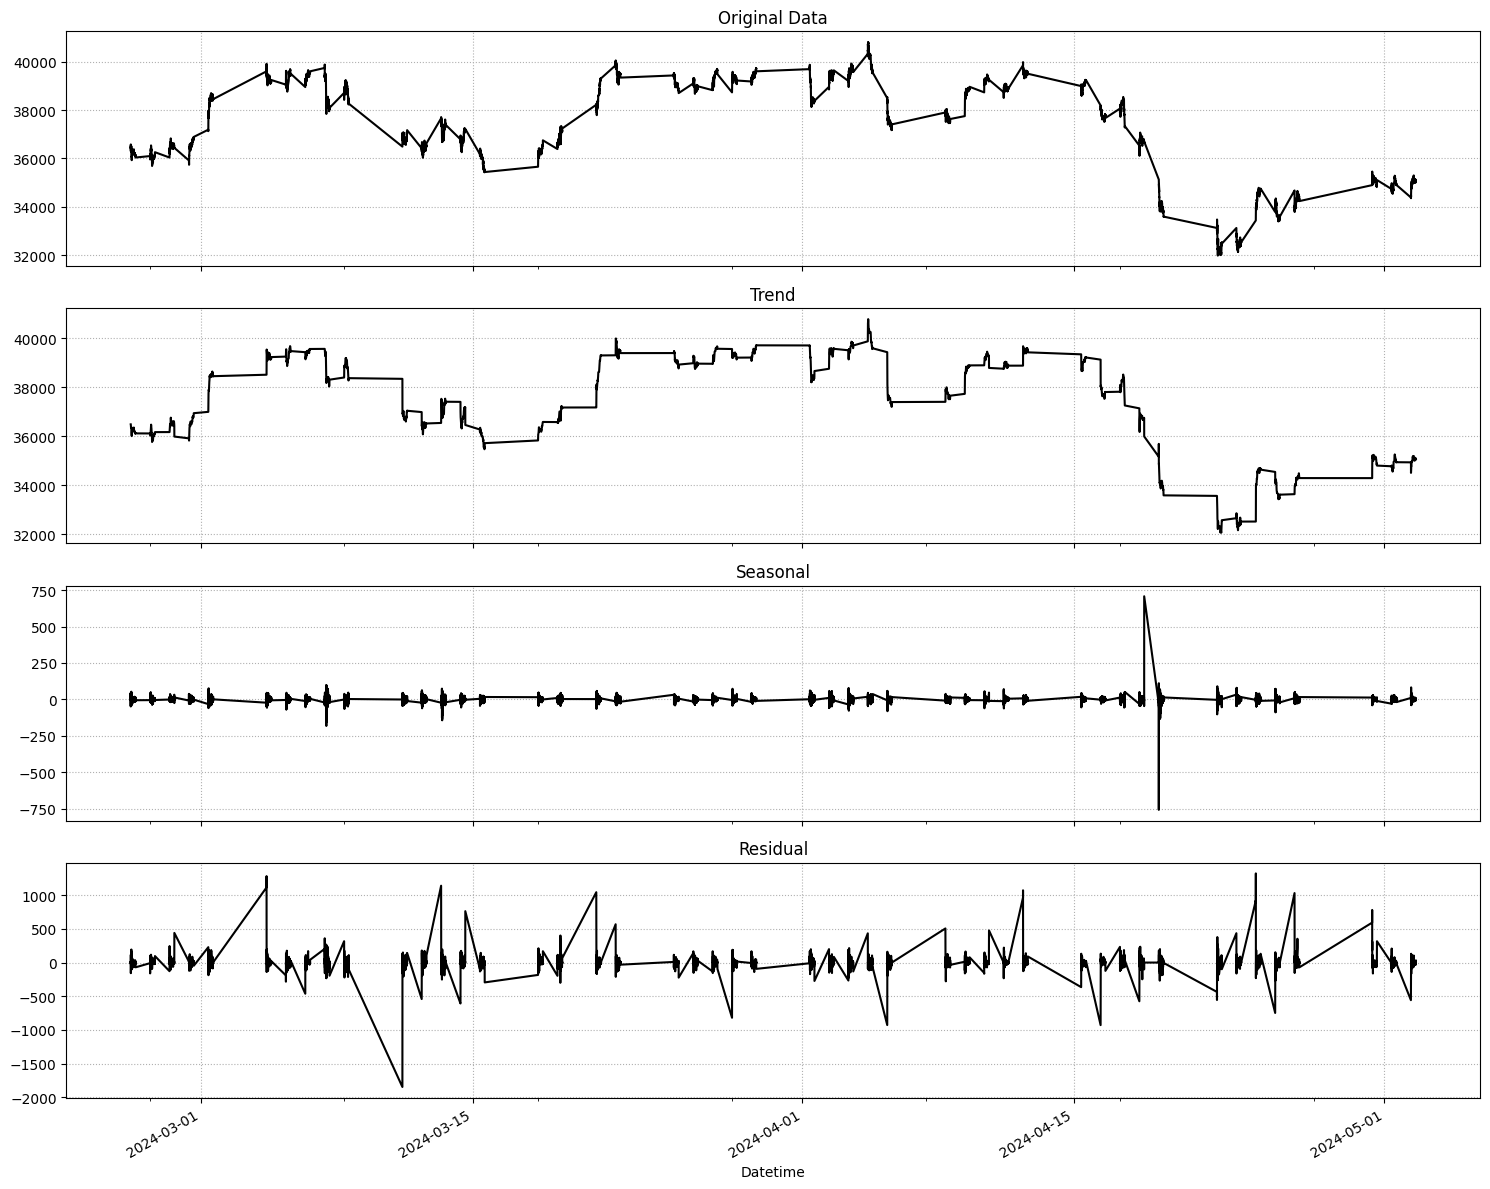

In [39]:
import statsmodels.api  as sm

# STL分解
stl = sm.tsa.STL(df_close, period=7, robust=True).fit()

# それぞれの成分を描画
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

df_close.plot(ax=ax[0], c='black')
ax[0].set_title("Original Data")
ax[0].grid(linestyle=':')

stl.trend.plot(ax=ax[1], c='black')
ax[1].set_title("Trend")
ax[1].grid(linestyle=':')

stl.seasonal.plot(ax=ax[2], c='black')
ax[2].set_title("Seasonal")
ax[2].grid(linestyle=':')

stl.resid.plot(ax=ax[3], c='black')
ax[3].set_title("Residual")
ax[3].grid(linestyle=':')

plt.tight_layout()

plt.show()